In [8]:
import pandas as pd

df = pd.read_csv("/home/mukesh/pikachu/classification_nlp/data/text_embedding.csv")


df.head(5)


,original_text,processed_text,level,w2v_embedding,glove_embedding,fasttest_embedding
0,the rock is destined to be the 21st century's ...,rock destined century new conan going make spl...,positive,[ 0.03640927 0.06906666 -0.00169154 0.093462...,[ 5.45294543e-02 -7.68111763e-02 -7.33455899e-...,[-1.52158617e-03 -2.02013471e-02 2.54578856e-...
1,"the gorgeously elaborate continuation of "" the...",gorgeously elaborate continuation lord ring tr...,positive,[-4.91776900e-02 8.17177512e-03 -3.89515270e-...,[-1.68025580e-01 -7.40081341e-02 5.22192722e-...,[ 3.54660909e-03 -1.69781280e-02 2.64240860e-...
2,effective but too-tepid biopic,effective tootepid biopic,positive,[ 0.08540853 -0.07674154 -0.00537109 0.105305...,[ 1.09353339e-01 -1.59386670e-01 2.75996665e-...,[ 3.95808655e-03 -3.52620004e-02 -1.91266687e-...
3,if you sometimes like to go to the movies to h...,sometimes like go movie fun wasabi good place ...,positive,[ 1.03352861e-02 -4.88281250e-03 -1.02183027e-...,[-3.07607986e-02 6.90418854e-02 9.24188718e-...,[-1.72843784e-02 -1.76313315e-02 1.40686762e-...
4,"emerges as something rare , an issue movie tha...",emerges something rare issue movie thats hones...,positive,[ 0.09057617 0.02848229 -0.06612338 0.139347...,[-2.13076291e-03 5.80857731e-02 5.99409416e-...,[ 5.08236885e-03 3.32006975e-03 3.94619070e-...


In [9]:
df = df[["processed_text","level"]]

In [10]:
df

,processed_text,level
0,rock destined century new conan going make spl...,positive
1,gorgeously elaborate continuation lord ring tr...,positive
2,effective tootepid biopic,positive
3,sometimes like go movie fun wasabi good place ...,positive
4,emerges something rare issue movie thats hones...,positive
...,...,...
9995,terrible movie people nevertheless find moving,negative
9996,many definition time waster movie must surely one,negative
9997,stand crocodile hunter hurried badly cobbled l...,negative
9998,thing look like madeforhomevideo quickie,negative


In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/mukesh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/mukesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/mukesh/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/mukesh/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/mukesh/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/mukesh/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/mukesh/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[n

In [15]:
df['tokens'] = df['processed_text'].apply(word_tokenize)


In [19]:
df = df.sample(frac=1, random_state=69).reset_index(drop=True)


In [20]:
df

,processed_text,level,tokens
0,aan opportunity wasted,negative,"[aan, opportunity, wasted]"
1,last time joke flowed chos life story provided...,negative,"[last, time, joke, flowed, chos, life, story, ..."
2,may seem long minute fan includes segment song...,positive,"[may, seem, long, minute, fan, includes, segme..."
3,another best year selection,positive,"[another, best, year, selection]"
4,precious new star war movie lumbering wheezy drag,negative,"[precious, new, star, war, movie, lumbering, w..."
...,...,...,...
9995,comprehensible dummy guide something even nont...,positive,"[comprehensible, dummy, guide, something, even..."
9996,one staggeringly wellproduced joylessly extrav...,negative,"[one, staggeringly, wellproduced, joylessly, e..."
9997,master disguise fall category sketch saturday ...,negative,"[master, disguise, fall, category, sketch, sat..."
9998,full detail man country well worth seeing,positive,"[full, detail, man, country, well, worth, seeing]"


In [ ]:
from sklearn.preprocessing import LabelEncoder

texts = df['processed_text'].values
labels = df['level'].values

# Convert labels to binary (0 for negative, 1 for positive)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Define tokenizer parameters
vocab_size = 20000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')


In [29]:
tokenizer

In [30]:
texts

array(['aan opportunity wasted',
       'last time joke flowed chos life story provided engrossing dramatic line comedian hide behind obviously constructed routine',
       'may seem long minute fan includes segment song reunion concert',
       ..., 'master disguise fall category sketch saturday night live',
       'full detail man country well worth seeing',
       'mocking kung fu picture staple exploitation theater programming witty mocking exercise pointlessness'],
      dtype=object)

In [31]:
print(tokenizer.word_index)


{'<OOV>': 1, 'film': 2, 'movie': 3, 'one': 4, 'like': 5, 'story': 6, 'make': 7, 'character': 8, 'time': 9, 'comedy': 10, 'much': 11, 'good': 12, 'even': 13, 'way': 14, 'work': 15, 'performance': 16, 'little': 17, 'life': 18, 'funny': 19, 'feel': 20, 'director': 21, 'get': 22, 'enough': 23, 'never': 24, 'u': 25, 'may': 26, 'thing': 27, 'best': 28, 'would': 29, 'love': 30, 'bad': 31, 'doesnt': 32, 'look': 33, 'take': 34, 'could': 35, 'come': 36, 'well': 37, 'new': 38, 'there': 39, 'year': 40, 'something': 41, 'really': 42, 'drama': 43, 'audience': 44, 'see': 45, 'made': 46, 'plot': 47, 'thats': 48, 'many': 49, 'still': 50, 'two': 51, 'every': 52, 'better': 53, 'nothing': 54, 'people': 55, 'without': 56, 'go': 57, 'long': 58, 'action': 59, 'give': 60, 'end': 61, 'fun': 62, 'great': 63, 'though': 64, 'picture': 65, 'cannot': 66, 'big': 67, 'actor': 68, 'might': 69, 'cast': 70, 'kind': 71, 'minute': 72, 'another': 73, 'script': 74, 'first': 75, 'also': 76, 'humor': 77, 'sense': 78, 'world':

In [32]:
sequences

[[8937, 781, 1791],
 [166,
  9,
  207,
  8938,
  2455,
  18,
  6,
  3927,
  513,
  339,
  242,
  2197,
  1981,
  527,
  993,
  1121,
  599],
 [26, 156, 58, 72, 139, 2824, 3928, 575, 2456, 2457],
 [73, 28, 40, 3929],
 [1202, 38, 145, 173, 3, 6243, 8939, 528],
 [309, 46, 493, 2, 1122, 123, 213, 340, 6244, 4801, 50, 1280, 600, 628, 252],
 [3930, 59, 65, 994, 253, 4, 681, 85, 6245],
 [8940, 8941, 2198, 8942, 139, 3299],
 [2199, 17, 146, 1982, 4802, 228, 16, 6246, 78, 6247],
 [1493, 146, 8943, 3, 48, 403, 4803, 182, 839],
 [352, 5, 1643, 2458, 2825, 268, 2459, 448, 6248, 108, 123, 1494, 102, 1376],
 [5,
  629,
  257,
  630,
  1377,
  2200,
  1378,
  6249,
  4,
  100,
  290,
  2826,
  8944,
  2201,
  6250],
 [30, 4804, 2827, 7, 97, 243, 91],
 [3300, 6251, 478, 529, 6252, 316, 24, 888, 2460, 208, 1792, 6253, 601],
 [4805, 631, 76, 353, 6254, 995, 1495, 3301, 2, 3931],
 [278, 840, 90, 123, 2461, 2462, 2463, 4806, 8945, 68],
 [1793, 5, 479, 279, 106],
 [95, 20, 3, 782, 119, 254, 25],
 [930, 625

In [33]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_encoded, test_size=0.2, random_state=42)


In [34]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/home/mukesh/pikachu/classification_nlp/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-04 12:15:13.553340: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5008 - loss: 0.6964 - val_accuracy: 0.5094 - val_loss: 0.6947
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.4914 - loss: 0.6957 - val_accuracy: 0.4950 - val_loss: 0.6954
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5046 - loss: 0.6948 - val_accuracy: 0.5131 - val_loss: 0.6948
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4977 - loss: 0.6949 - val_accuracy: 0.5125 - val_loss: 0.6939
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5195 - loss: 0.6935 - val_accuracy: 0.5056 - val_loss: 0.6956
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4899 - loss: 0.6965 - val_accuracy: 0.4844 - val_loss: 0.6957
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.4783 - loss: 0.6965 - val_accuracy: 0.4869 - val_loss: 0.6963
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5057 - loss: 0.6961 - val_accu

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5099 - loss: 0.6945
Test Accuracy: 0.4935


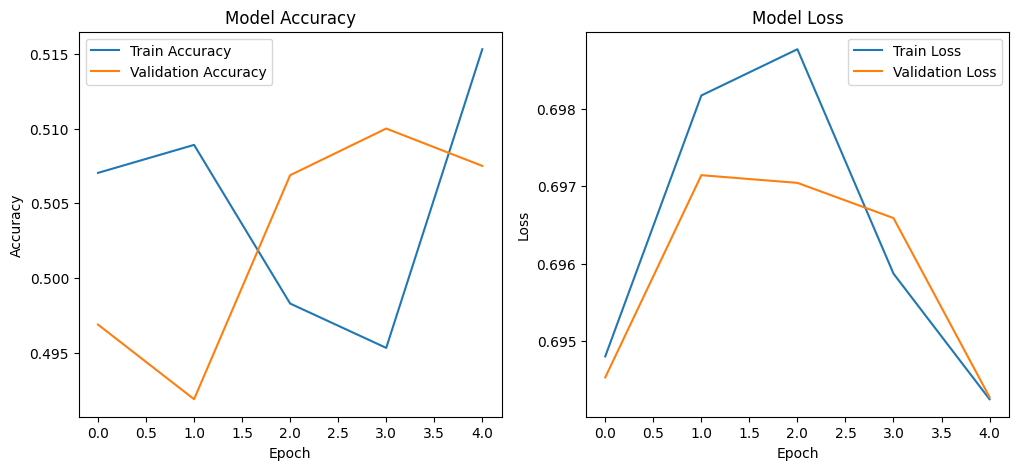

In [38]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
